In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, decomposition
from mpl_toolkits.mplot3d import Axes3D

sns.set(style='white')

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # (150, 4)

(150, 4)


In [3]:
fig = plt.figure(1, figsize=(6, 5))
ax = Axes3D(fig, elev=48, azim=134)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center')
colors = np.choose(y, ["blue", "green", "red"])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)
plt.show()

<Figure size 600x500 with 0 Axes>

In [4]:
X_centered = X - X.mean(axis=0)
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

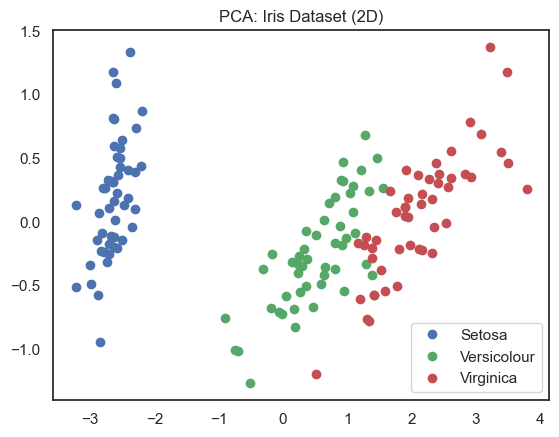

In [5]:
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend()
plt.title("PCA: Iris Dataset (2D)")
plt.show()

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

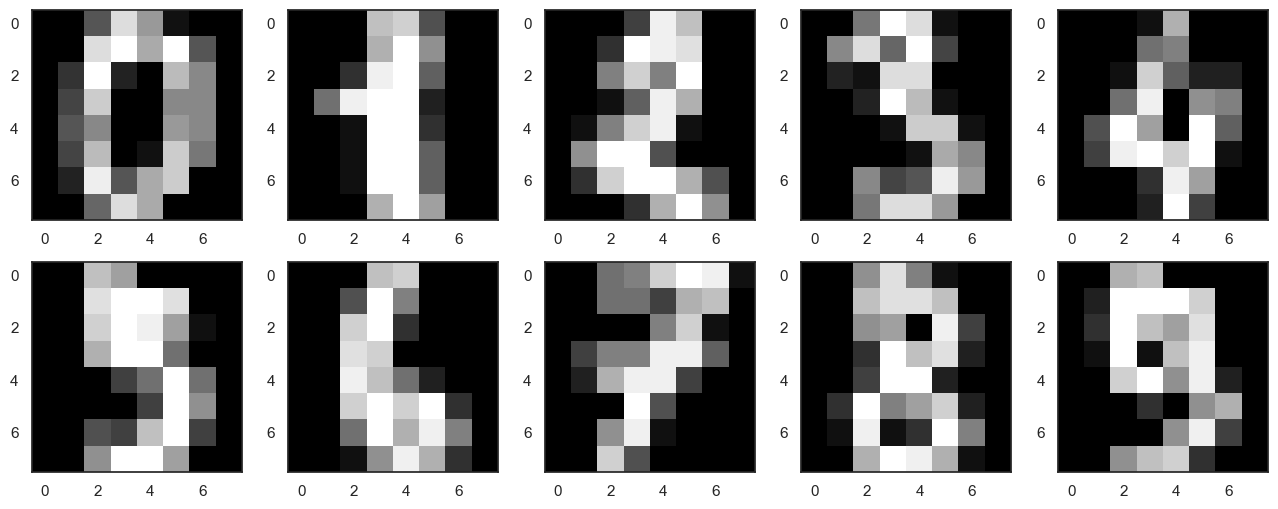

In [7]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
plt.show()

In [8]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

/var/folders/23/rv0gs7nx35dbcrtzwhv7kmth0000gn/T/ipykernel_23221/3957670951.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


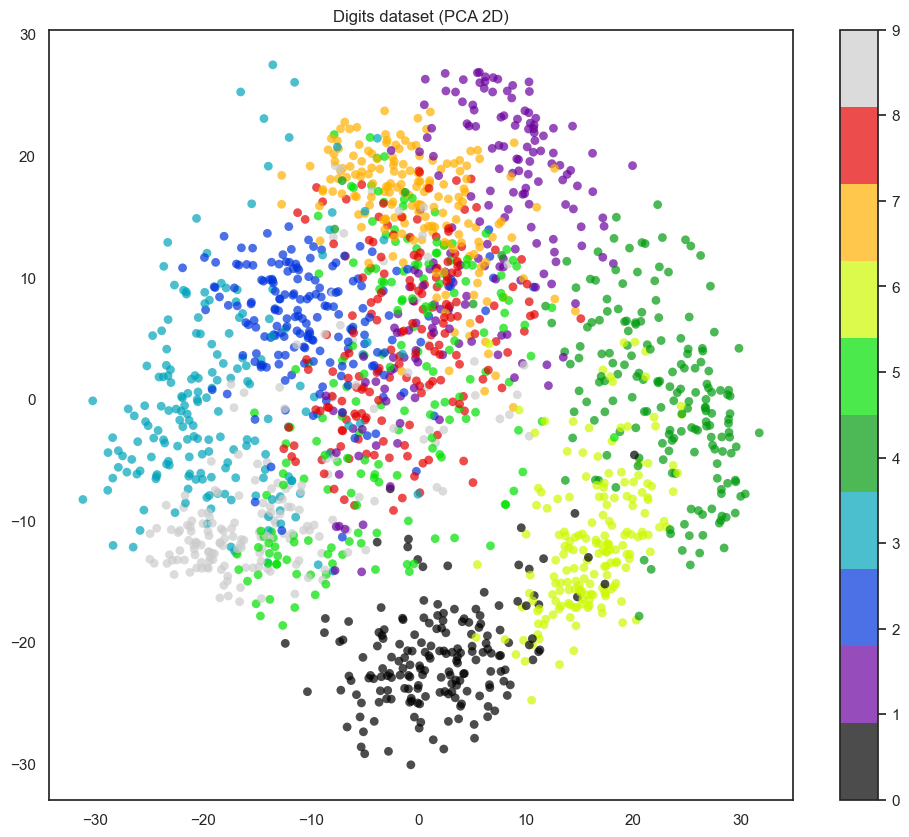

In [9]:
plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title("Digits dataset (PCA 2D)")
plt.show()

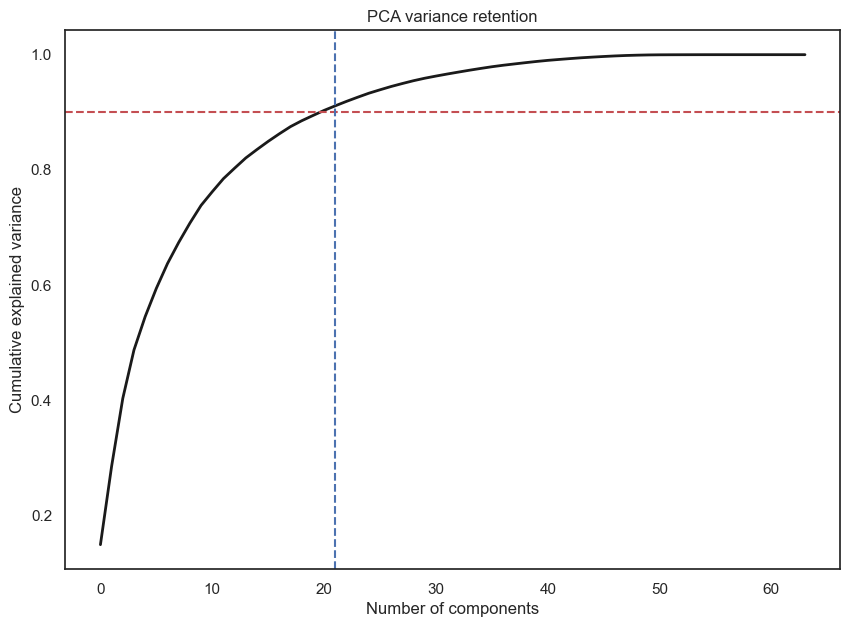

In [10]:
pca = decomposition.PCA().fit(X)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, color='r', linestyle='--')
plt.axvline(21, color='b', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA variance retention')
plt.show()

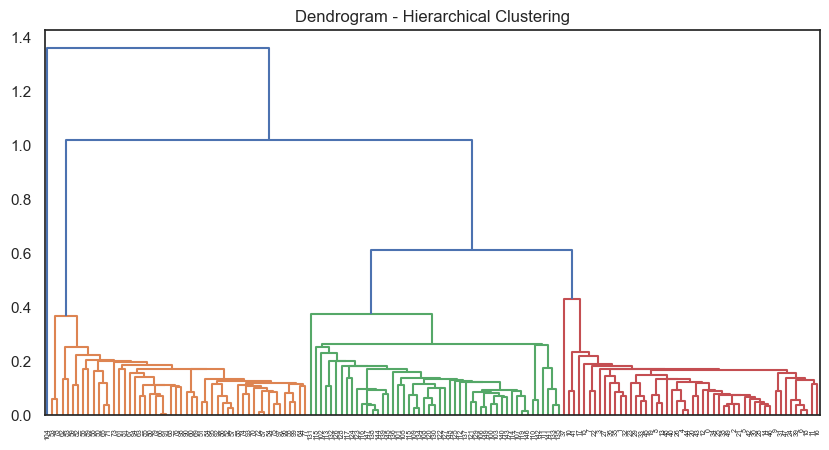

In [11]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))
np.random.seed(42)
X[:50] = np.random.normal(0.0, 0.3, (50, 2))
X[50:100] = np.random.normal([2.0, -1.0], [0.5, 0.2], (50, 2))
X[100:] = np.random.normal([-1.0, 2.0], [0.2, 0.5], (50, 2))

Z = hierarchy.linkage(pdist(X), method='single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)
plt.title("Dendrogram - Hierarchical Clustering")
plt.show()

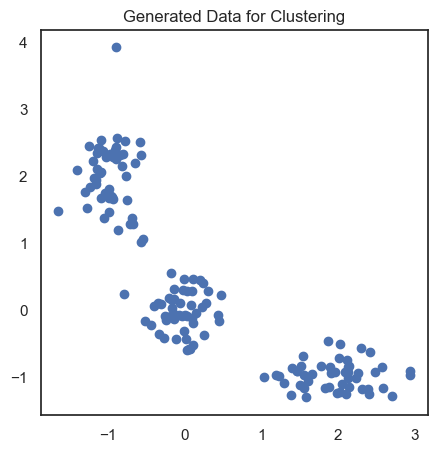

In [12]:
from sklearn.cluster import KMeans

Z = X.copy()  # используем те же данные

plt.figure(figsize=(5, 5))
plt.scatter(Z[:, 0], Z[:, 1])
plt.title("Generated Data for Clustering")
plt.show()

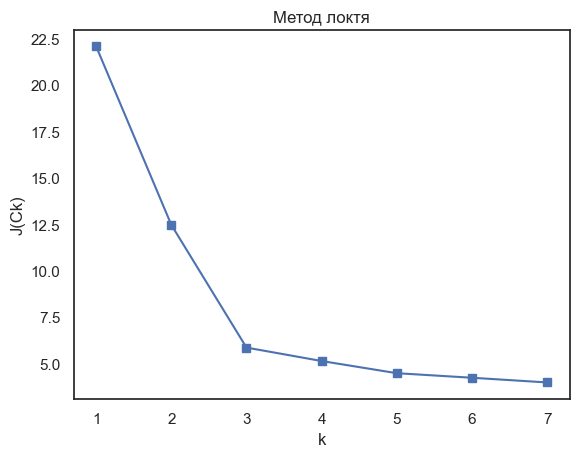

In [13]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(Z)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('k')
plt.ylabel('J(Ck)')
plt.title("Метод локтя")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(Z)
labels = kmeans.labels_

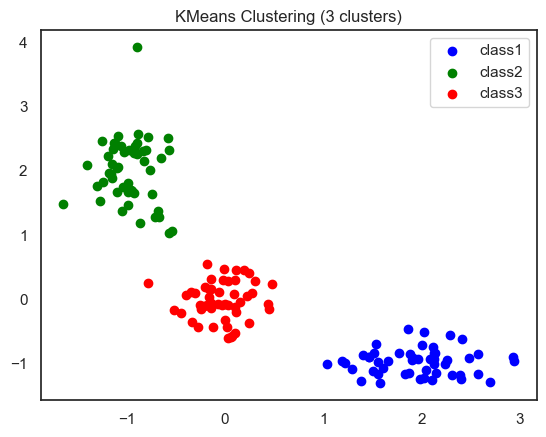

In [15]:
plt.scatter(Z[labels == 0, 0], Z[labels == 0, 1], color='blue', label='class1')
plt.scatter(Z[labels == 1, 0], Z[labels == 1, 1], color='green', label='class2')
plt.scatter(Z[labels == 2, 0], Z[labels == 2, 1], color='red', label='class3')
plt.legend()
plt.title("KMeans Clustering (3 clusters)")
plt.show()

In [16]:
from sklearn import metrics

# Предположим, что истинные метки совпадают с генерацией:
true_labels = np.array([0]*50 + [1]*50 + [2]*50)

# ARI — Adjusted Rand Index
ari = metrics.adjusted_rand_score(true_labels, labels)

# AMI — Adjusted Mutual Information
ami = metrics.adjusted_mutual_info_score(true_labels, labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")

Adjusted Rand Index: 1.0000
Adjusted Mutual Information: 1.0000
